# Libraries & Packages

Importing required libraries and packages.

`cv2:` Open source Computer Vision Library(provide tools for image and video analysis, processing, feature detection, machine learning and many more).You can install it using:`pip install opencv-python`



`seaborn:`A Python data visualization library based on Matplotlib. Provides a high-level interface for drawing attractive and informative statistical graphics. You can install it using `pip install seaborn`

`PIL:` Pillow Library(Python Imaging Library), a powerful tool for handling images in python.

`Tensorflow:` Widely used for building and training machine learning models, particularly deep learning models.

`Keras:` A user-friendly and modular deep learning library that allows to build and train neural networks with ease.

In [283]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #data visualization library
import cv2 #Open Source Computer Vision Library
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3) #reproduce the same results
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')


# Load Dataset 

#### MNIST handwritten digit classification dataset introduction
X_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

Y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

Y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [284]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Type and size of training and testing data 

In [285]:
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [286]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [287]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

#### visualize a random image from the dataset

In [288]:
print(X_train[15]) # printing 15'th image

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

we are seeing it's a numpy 2D array. let's print the image.

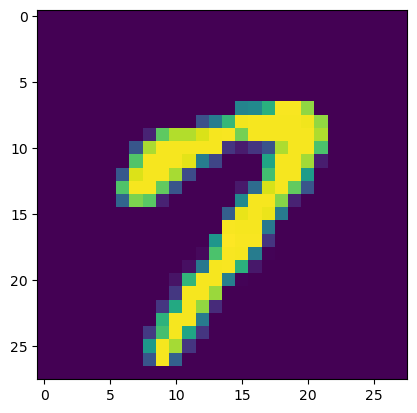

In [289]:
# display the image

plt.imshow(X_train[15])
plt.show()

Looks like 7?

In [290]:
# print the corresponding level

print(y_train[15])

7


In [291]:
# image size 

X_train[15].shape

(28, 28)

28 x 28 grayscale image

In [292]:
# let's see the unique value in training and testing data

print(np.unique(y_train)) # unique value in y_train
print(np.unique(y_test)) # unique value in y_test


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


both training and testing data contains 0-9. It seems a good dataset undoubtedly.

# Preprocessing

#### scaling the training and testing data 

In [293]:
X_train = X_train / 255
X_test = X_test / 255

In [294]:
# see what's happen after scalling
X_train[15] # 15'th image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now all pixel values are between 0-1

# Building The CNN Model

#### Setting up the layers of the neural network

##### Activation Function:
`ReLu:` (Rectified Linear Unit)  
   $$
   f(x) = \max(0, x)
   $$
   
`sigmoid:` (Logistic)
 $$ 
 f(z) = \frac{1}{1 + e^{-z}}
 $$


In [295]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

#### compile the model

In [296]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#### Train the model using traing data

In [297]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3082 - accuracy: 0.9108
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1441 - accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1058 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0860 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0698 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0599 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0526 - accuracy: 0.9827
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0456 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0415 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.034

#### Predict on the testing data

In [300]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


#### Accuracy Measure 

In [301]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Model accuracy: {accuracy * 100:.0f}%")


313/313 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9742
Model accuracy: 97%


# Analysis the prediction results

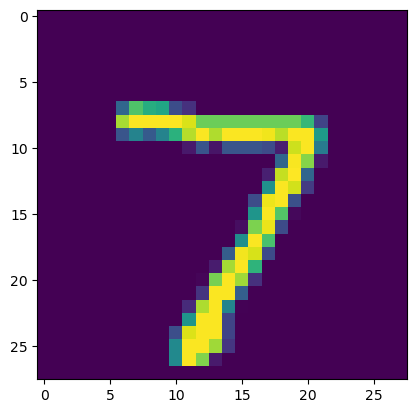

In [302]:
# first datapoint in X_test

plt.imshow(X_test[0])
plt.show()

In [303]:
y_test[0]

7

In [304]:
y_pred[0]

array([1.8828026e-04, 1.4545133e-04, 8.5131060e-03, 8.7227219e-01,
       2.2108581e-07, 3.1144967e-02, 1.3314889e-13, 9.9999112e-01,
       3.3683106e-03, 6.8064280e-02], dtype=float32)

Probability for being 0 - 9

#### converting the prediction probabilities to class label


In [305]:
y_pred = [np.argmax(i) for i in y_pred]

In [306]:
print(y_pred)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [307]:
# now check the y_pred[0]

y_pred[0]

7

#### Confusion matrix

In [308]:
cmat = confusion_matrix(y_test, y_pred)
cmat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    1,    0,    2,    1,    2,    2,    3,    0],
       [   0, 1125,    3,    2,    0,    0,    2,    0,    3,    0],
       [   4,    3,  999,    6,    6,    1,    3,    3,    7,    0],
       [   0,    1,    5,  988,    0,    8,    0,    3,    4,    1],
       [   0,    2,    2,    0,  970,    1,    4,    1,    0,    2],
       [   1,    0,    0,   10,    1,  865,    4,    2,    8,    1],
       [   2,    3,    1,    1,    3,    8,  937,    0,    3,    0],
       [   0,    9,    8,    2,    2,    1,    0, 1000,    2,    4],
       [   3,    1,    2,    4,    5,    9,    1,    2,  945,    2],
       [   4,    6,    0,    8,   27,   10,    1,    7,    2,  944]])>

Text(0.5, 47.7222222222222, 'True Label')

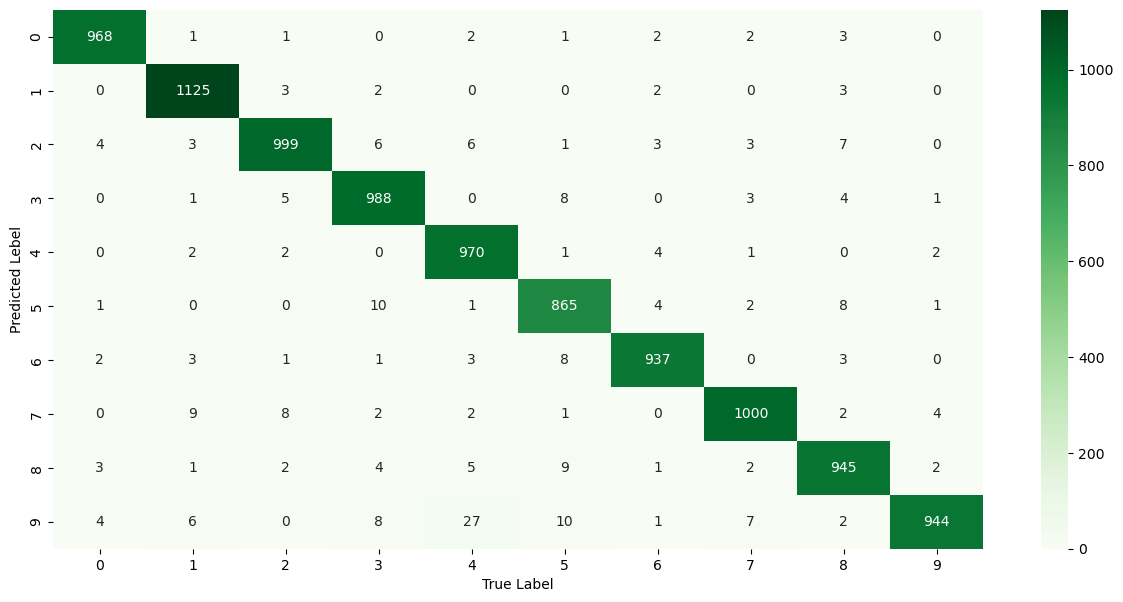

In [309]:
# visualize 
plt.figure(figsize = (15, 7)) #(widht, height)
sns.heatmap(cmat, annot = True, fmt = 'd', cmap = 'Greens')
plt.ylabel('Predicted Lebel')
plt.xlabel('True Label')

# Number Prediction 

#### Preprocess the image

`preprocess_image():` returns the preprocessed binary image (thresh). This preprocessing is used to enhance the quality of images before further analysis or feature extraction.

In [310]:
def preprocess_image(img):
    # Apply GaussianBlur and adaptive thresholding
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return thresh

`resize_digit():`The resize_digit function resizes a digit image to a target size using OpenCV's `cv2.resize` function.This function takes an input digit image (digit) and an optional target_size parameter (defaulting to (28, 28)).

In [311]:
def resize_digit(digit, target_size=(28, 28)):
    # Resize digit to the target size
    resized_digit = cv2.resize(digit, target_size, interpolation=cv2.INTER_AREA)

    return resized_digit

`find_digits():`The find_digits function extracts individual digits from an image based on the presence of white pixels in each column.

In [312]:
def find_digits(img):
    # Get image width and height
    height, width = img.shape

    # Store the starting and ending columns for each digit
    digit_columns = []

    is_digit = False
    start_col = 0

    # Traverse columns
    for col in range(width):
        column_data = img[:, col]

        # Check if the column has any white pixels (digits)
        if np.any(column_data == 255):
            if not is_digit:
                start_col = col
                is_digit = True
        else:
            if is_digit:
                digit_columns.append((start_col-10, col+10))
                is_digit = False

    # Check if the last digit extends to the end
    if is_digit:
        digit_columns.append((start_col, width))

    # Filter out small columns
    min_column_width = 5  # Adjust this threshold based on your images
    digit_columns = [(start, end) for start, end in digit_columns if (end - start) > min_column_width]

    # Extract digits based on identified columns
    digits = [resize_digit(img[:, start:end]) for start, end in digit_columns]

    return digits

#### Load the image and read

In [313]:
img_path = r'E:\Project\Machine Learing\number4.png'

In [314]:
img_path

'E:\\Project\\Machine Learing\\number4.png'

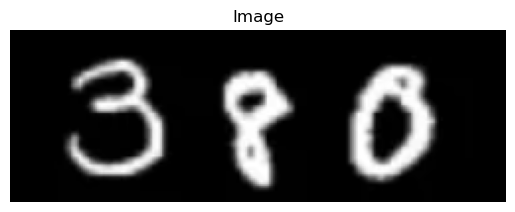

In [315]:
img = cv2.imread(img_path, 0) # read the image in grayscale

# display the image
plt.imshow(img, cmap='gray')  # 'gray' colormap for grayscale images
plt.title('Image')
plt.axis('off')  # Turn off axis labels
plt.show()

###### Preprocess the image by invoking the above-defined function.

In [316]:
preprocessed_img = preprocess_image(img)

##### Extract the digits from number by invoking above-defined function

In [317]:
digit_images = find_digits(preprocessed_img)

##### Display the individual digit images 

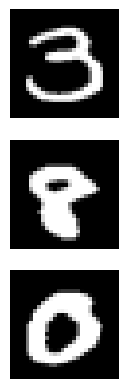

In [318]:
for i, digit_image in enumerate(digit_images):
    plt.subplot(len(digit_images), 1, i+1)
    plt.imshow(digit_image, cmap='gray')  # assuming images are grayscale
    plt.axis('off')  # Turn off axis labels

plt.show()

##### convert the digit_images array into numpy array

In [319]:
digit_images = np.array(digit_images)
digit_images.shape

(3, 28, 28)

##### scaling

In [320]:
digit_images = digit_images / 255

##### make prediction on every single digit using the model

In [321]:
digits_pred = model.predict(digit_images)

1/1 [==============================] - 0s 22ms/step


##### print every digit for constructing the number

In [322]:
digits_ = [np.argmax(i) for i in digits_pred]
print('predicted number: ', end = '')
for i in digits_:
    print(i, end='')

predicted number: 380